![JohnSnowLabs](https://nlp.johnsnowlabs.com/assets/images/logo.png)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/JohnSnowLabs/nlu/blob/master/examples/colab/Training/binary_text_classification/NLU_training_sarcasam_classifier_demo_news_headlines.ipynb)


# Training a Sentiment Analysis Classifier with NLU 
## 2 Class  News Headlines Sarcasam Training
With the [SentimentDL model](https://nlp.johnsnowlabs.com/docs/en/annotators#sentimentdl-multi-class-sentiment-analysis-annotator)  from Spark NLP you can achieve State Of the Art results on any multi class text classification problem 

This notebook showcases the following features : 

- How to train the deep learning classifier
- How to store a pipeline to disk
- How to load the pipeline from disk (Enables NLU offline mode)

You can achieve these results or even better on this dataset with training data:


<br>

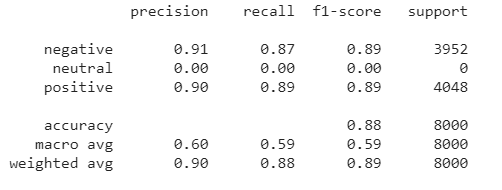

You can achieve these results or even better on this dataset with test  data:


<br>

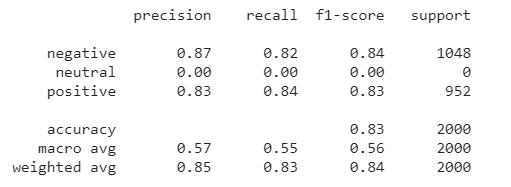





# 1. Install Java 8 and NLU

In [ ]:
!wget https://setup.johnsnowlabs.com/nlu/colab.sh -O - | bash
import nlu

--2021-05-05 04:02:42--  https://raw.githubusercontent.com/JohnSnowLabs/nlu/master/scripts/colab_setup.sh
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1671 (1.6K) [text/plain]
Saving to: ‘STDOUT’

-                   100%[===================>]   1.63K  --.-KB/s    in 0s      

2021-05-05 04:02:42 (33.7 MB/s) - written to stdout [1671/1671]

Installing  NLU 3.0.0 with  PySpark 3.0.2 and Spark NLP 3.0.1 for Google Colab ...
     |████████████████████████████████| 204.8MB 74kB/s 
     |████████████████████████████████| 153kB 68.2MB/s 
     |████████████████████████████████| 204kB 20.5MB/s 
     |████████████████████████████████| 204kB 79.6MB/s 


# 2. Download News Headlines Sarcsam dataset 
https://www.kaggle.com/rmisra/news-headlines-dataset-for-sarcasm-detection
#Context
Past studies in Sarcasm Detection mostly make use of Twitter datasets collected using hashtag based supervision but such datasets are noisy in terms of labels and language. Furthermore, many tweets are replies to other tweets and detecting sarcasm in these requires the availability of contextual tweets.

To overcome the limitations related to noise in Twitter datasets, this News Headlines dataset for Sarcasm Detection is collected from two news website. TheOnion aims at producing sarcastic versions of current events and we collected all the headlines from News in Brief and News in Photos categories (which are sarcastic). We collect real (and non-sarcastic) news headlines from HuffPost.

This new dataset has following advantages over the existing Twitter datasets:

Since news headlines are written by professionals in a formal manner, there are no spelling mistakes and informal usage. This reduces the sparsity and also increases the chance of finding pre-trained embeddings.

Furthermore, since the sole purpose of TheOnion is to publish sarcastic news, we get high-quality labels with much less noise as compared to Twitter datasets.

Unlike tweets which are replies to other tweets, the news headlines we obtained are self-contained. This would help us in teasing apart the real sarcastic elements.


In [ ]:
! wget http://ckl-it.de/wp-content/uploads/2021/02/Sarcasm_Headlines_Dataset_v2.csv


--2021-05-05 04:04:22--  http://ckl-it.de/wp-content/uploads/2021/02/Sarcasm_Headlines_Dataset_v2.csv
Resolving ckl-it.de (ckl-it.de)... 217.160.0.108, 2001:8d8:100f:f000::209
Connecting to ckl-it.de (ckl-it.de)|217.160.0.108|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2381880 (2.3M) [text/csv]
Saving to: ‘Sarcasm_Headlines_Dataset_v2.csv’

Sarcasm_Headlines_D 100%[===================>]   2.27M  --.-KB/s    in 0.1s    

2021-05-05 04:04:23 (15.7 MB/s) - ‘Sarcasm_Headlines_Dataset_v2.csv’ saved [2381880/2381880]



In [ ]:
import pandas as pd
test_path = '/content/Sarcasm_Headlines_Dataset_v2.csv'
train_df = pd.read_csv(test_path,sep=",")
cols = ["y","text"]
train_df = train_df[cols]
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(train_df, test_size=0.2)
train_df



,y,text
1463,positive,red cross installs blood drop-off bins for don...
9543,positive,president-elect edwards seen entering chinatow...
2930,positive,crowd at trump rally realizes they've been cha...
644,positive,kerry captures bin laden one week too late
2390,negative,"'new hampshire' episode 4: not just for old, w..."
...,...,...
9034,negative,deputy interior secretary met with lobbyist fo...
6330,negative,parents of kidnapped girls make desperate plea
7127,negative,image vs. substance in your self-made journey
7289,positive,'secretary clinton is a different person than ...


# 3. Train Deep Learning Classifier using nlu.load('train.sentiment')

You dataset label column should be named 'y' and the feature column with text data should be named 'text'

In [ ]:
import nlu 
from sklearn.metrics import classification_report

# load a trainable pipeline by specifying the train. prefix  and fit it on a datset with label and text columns
# by default the Universal Sentence Encoder (USE) Sentence embeddings are used for generation
trainable_pipe = nlu.load('train.sentiment')
fitted_pipe = trainable_pipe.fit(train_df.iloc[:50])

# predict with the trainable pipeline on dataset and get predictions
preds = fitted_pipe.predict(train_df.iloc[:50],output_level='document')
#sentence detector that is part of the pipe generates sone NaNs. lets drop them first
preds.dropna(inplace=True)
print(classification_report(preds['y'], preds['trained_sentiment']))

preds

tfhub_use download started this may take some time.
Approximate size to download 923.7 MB
[OK!]
sentence_detector_dl download started this may take some time.
Approximate size to download 354.6 KB
[OK!]
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00        24
     neutral       0.00      0.00      0.00         0
    positive       1.00      0.23      0.38        26

    accuracy                           0.12        50
   macro avg       0.33      0.08      0.12        50
weighted avg       0.52      0.12      0.20        50



,trained_sentiment,document,sentence_embedding_use,text,trained_sentiment_confidence,sentence,y,origin_index
0,neutral,red cross installs blood drop-off bins for don...,"[-0.07407097518444061, 0.020259270444512367, -...",red cross installs blood drop-off bins for don...,0.586574,[red cross installs blood drop-off bins for do...,positive,1463
1,neutral,president-elect edwards seen entering chinatow...,"[0.07900547981262207, 0.06132232025265694, 0.0...",president-elect edwards seen entering chinatow...,0.539660,[president-elect edwards seen entering chinato...,positive,9543
2,positive,crowd at trump rally realizes they've been cha...,"[0.00032250594813376665, -0.022321783006191254...",crowd at trump rally realizes they've been cha...,0.624888,[crowd at trump rally realizes they've been ch...,positive,2930
3,neutral,kerry captures bin laden one week too late,"[-0.004850792698562145, 0.017207739874720573, ...",kerry captures bin laden one week too late,0.594691,[kerry captures bin laden one week too late],positive,644
4,neutral,"'new hampshire' episode 4: not just for old, w...","[-0.04294964671134949, -0.07175017148256302, -...","'new hampshire' episode 4: not just for old, w...",0.546094,"['new hampshire' episode 4: not just for old, ...",negative,2390
5,neutral,12 indie spots in hong kong,"[-0.036156971007585526, -0.014244569465517998,...",12 indie spots in hong kong,0.509936,[12 indie spots in hong kong],negative,5450
6,neutral,former refugee fights for her dream to abolish...,"[-0.0035593388602137566, 0.008986725471913815,...",former refugee fights for her dream to abolish...,0.578656,[former refugee fights for her dream to abolis...,negative,7739
7,neutral,"watch out, sephora. h&m beauty is coming for you.","[-0.02806154452264309, -0.04734545946121216, 0...","watch out, sephora. h&m beauty is coming for you.",0.503327,"[watch out, sephora., h&m beauty is coming for...",negative,4370
8,neutral,computer scientists say ai's underdeveloped et...,"[-0.007209080271422863, -0.01665995828807354, ...",computer scientists say ai's underdeveloped et...,0.564115,[computer scientists say ai's underdeveloped e...,positive,9418
9,neutral,"past armageddon and on to zippori, one of isra...","[-0.0013639864046126604, -0.05516374856233597,...","past armageddon and on to zippori, one of isra...",0.528413,"[past armageddon and on to zippori, one of isr...",negative,4357


# 4. Test the fitted pipe on new example

In [ ]:
fitted_pipe.predict('Aliens are immortal!')


,trained_sentiment,document,sentence_embedding_use,trained_sentiment_confidence,sentence,origin_index
0,neutral,Aliens are immortal!,"[-0.0700131505727768, -0.06706050038337708, -0...",0.549292,[Aliens are immortal!],0


## 5. Configure pipe training parameters

In [ ]:
trainable_pipe.print_info()

The following parameters are configurable for this NLU pipeline (You can copy paste the examples) :
>>> pipe['sentiment_dl'] has settable params:
pipe['sentiment_dl'].setMaxEpochs(1)                 | Info: Maximum number of epochs to train | Currently set to : 1
pipe['sentiment_dl'].setLr(0.005)                    | Info: Learning Rate | Currently set to : 0.005
pipe['sentiment_dl'].setBatchSize(64)                | Info: Batch size | Currently set to : 64
pipe['sentiment_dl'].setDropout(0.5)                 | Info: Dropout coefficient | Currently set to : 0.5
pipe['sentiment_dl'].setEnableOutputLogs(True)       | Info: Whether to use stdout in addition to Spark logs. | Currently set to : True
pipe['sentiment_dl'].setThreshold(0.6)               | Info: The minimum threshold for the final result otheriwse it will be neutral | Currently set to : 0.6
pipe['sentiment_dl'].setThresholdLabel('neutral')    | Info: In case the score is less than threshold, what should be the label. Default i

## 6. Retrain with new parameters

In [ ]:
# Train longer!
trainable_pipe['sentiment_dl'].setMaxEpochs(5)  
fitted_pipe = trainable_pipe.fit(train_df.iloc[:50])
# predict with the trainable pipeline on dataset and get predictions
preds = fitted_pipe.predict(train_df.iloc[:50],output_level='document')

#sentence detector that is part of the pipe generates sone NaNs. lets drop them first
preds.dropna(inplace=True)
print(classification_report(preds['y'], preds['trained_sentiment']))

preds

              precision    recall  f1-score   support

    negative       1.00      0.88      0.93        24
     neutral       0.00      0.00      0.00         0
    positive       0.96      0.92      0.94        26

    accuracy                           0.90        50
   macro avg       0.65      0.60      0.62        50
weighted avg       0.98      0.90      0.94        50



,trained_sentiment,document,sentence_embedding_use,text,trained_sentiment_confidence,sentence,y,origin_index
0,positive,red cross installs blood drop-off bins for don...,"[-0.07407097518444061, 0.020259270444512367, -...",red cross installs blood drop-off bins for don...,0.918347,[red cross installs blood drop-off bins for do...,positive,1463
1,neutral,president-elect edwards seen entering chinatow...,"[0.07900547981262207, 0.06132232025265694, 0.0...",president-elect edwards seen entering chinatow...,0.591700,[president-elect edwards seen entering chinato...,positive,9543
2,positive,crowd at trump rally realizes they've been cha...,"[0.00032250594813376665, -0.022321783006191254...",crowd at trump rally realizes they've been cha...,0.963672,[crowd at trump rally realizes they've been ch...,positive,2930
3,positive,kerry captures bin laden one week too late,"[-0.004850792698562145, 0.017207739874720573, ...",kerry captures bin laden one week too late,0.846780,[kerry captures bin laden one week too late],positive,644
4,negative,"'new hampshire' episode 4: not just for old, w...","[-0.04294964671134949, -0.07175017148256302, -...","'new hampshire' episode 4: not just for old, w...",0.888615,"['new hampshire' episode 4: not just for old, ...",negative,2390
5,negative,12 indie spots in hong kong,"[-0.036156971007585526, -0.014244569465517998,...",12 indie spots in hong kong,0.889380,[12 indie spots in hong kong],negative,5450
6,neutral,former refugee fights for her dream to abolish...,"[-0.0035593388602137566, 0.008986725471913815,...",former refugee fights for her dream to abolish...,0.516011,[former refugee fights for her dream to abolis...,negative,7739
7,negative,"watch out, sephora. h&m beauty is coming for you.","[-0.02806154452264309, -0.04734545946121216, 0...","watch out, sephora. h&m beauty is coming for you.",0.904426,"[watch out, sephora., h&m beauty is coming for...",negative,4370
8,positive,computer scientists say ai's underdeveloped et...,"[-0.007209080271422863, -0.01665995828807354, ...",computer scientists say ai's underdeveloped et...,0.881709,[computer scientists say ai's underdeveloped e...,positive,9418
9,negative,"past armageddon and on to zippori, one of isra...","[-0.0013639864046126604, -0.05516374856233597,...","past armageddon and on to zippori, one of isra...",0.887740,"[past armageddon and on to zippori, one of isr...",negative,4357


# 7. Try training with different Embeddings

In [ ]:
# We can use nlu.print_components(action='embed_sentence') to see every possibler sentence embedding we could use. Lets use bert!
nlu.print_components(action='embed_sentence')

For language <en> NLU provides the following Models : 
nlu.load('en.embed_sentence') returns Spark NLP model tfhub_use
nlu.load('en.embed_sentence.use') returns Spark NLP model tfhub_use
nlu.load('en.embed_sentence.tfhub_use') returns Spark NLP model tfhub_use
nlu.load('en.embed_sentence.use.lg') returns Spark NLP model tfhub_use_lg
nlu.load('en.embed_sentence.tfhub_use.lg') returns Spark NLP model tfhub_use_lg
nlu.load('en.embed_sentence.albert') returns Spark NLP model albert_base_uncased
nlu.load('en.embed_sentence.electra') returns Spark NLP model sent_electra_small_uncased
nlu.load('en.embed_sentence.electra_small_uncased') returns Spark NLP model sent_electra_small_uncased
nlu.load('en.embed_sentence.electra_base_uncased') returns Spark NLP model sent_electra_base_uncased
nlu.load('en.embed_sentence.electra_large_uncased') returns Spark NLP model sent_electra_large_uncased
nlu.load('en.embed_sentence.bert') returns Spark NLP model sent_bert_base_uncased
nlu.load('en.embed_sentenc

In [ ]:
trainable_pipe = nlu.load('en.embed_sentence.small_bert_L12_768 train.sentiment')
# We need to train longer and user smaller LR for NON-USE based sentence embeddings usually
# We could tune the hyperparameters further with hyperparameter tuning methods like gridsearch
# Also longer training gives more accuracy
trainable_pipe['sentiment_dl'].setMaxEpochs(120)  
trainable_pipe['sentiment_dl'].setLr(0.0005) 
fitted_pipe = trainable_pipe.fit(train_df)
# predict with the trainable pipeline on dataset and get predictions
preds = fitted_pipe.predict(train_df,output_level='document')

#sentence detector that is part of the pipe generates sone NaNs. lets drop them first
preds.dropna(inplace=True)
print(classification_report(preds['y'], preds['trained_sentiment']))

#preds

sent_small_bert_L12_768 download started this may take some time.
Approximate size to download 392.9 MB
[OK!]
sentence_detector_dl download started this may take some time.
Approximate size to download 354.6 KB
[OK!]
              precision    recall  f1-score   support

    negative       0.90      0.88      0.89      4023
     neutral       0.00      0.00      0.00         0
    positive       0.90      0.88      0.89      3977

    accuracy                           0.88      8000
   macro avg       0.60      0.58      0.59      8000
weighted avg       0.90      0.88      0.89      8000



# 7.1 evaluate on Test Data

In [ ]:
preds = fitted_pipe.predict(test_df,output_level='document')

#sentence detector that is part of the pipe generates sone NaNs. lets drop them first
preds.dropna(inplace=True)
print(classification_report(preds['y'], preds['trained_sentiment']))

              precision    recall  f1-score   support

    negative       0.84      0.82      0.83       977
     neutral       0.00      0.00      0.00         0
    positive       0.86      0.81      0.83      1023

    accuracy                           0.82      2000
   macro avg       0.57      0.55      0.56      2000
weighted avg       0.85      0.82      0.83      2000



# 8. Lets save the model

In [ ]:
stored_model_path = './models/classifier_dl_trained' 
fitted_pipe.save(stored_model_path)

Stored model in ./models/classifier_dl_trained


# 9. Lets load the model from HDD.
This makes Offlien NLU usage possible!   
You need to call nlu.load(path=path_to_the_pipe) to load a model/pipeline from disk.

In [ ]:
hdd_pipe = nlu.load(path=stored_model_path)

preds = hdd_pipe.predict('Aliens are immortal!')

preds

,document,text,sentiment,origin_index,sentence,sentiment_confidence,sentence_embedding_from_disk
0,Aliens are immortal!,Aliens are immortal!,[negative],8589934592,[Aliens are immortal!],[0.9999138],"[[0.30930545926094055, 0.12947328388690948, 0...."


In [ ]:
hdd_pipe.print_info()

The following parameters are configurable for this NLU pipeline (You can copy paste the examples) :
>>> pipe['document_assembler'] has settable params:
pipe['document_assembler'].setCleanupMode('shrink')                                    | Info: possible values: disabled, inplace, inplace_full, shrink, shrink_full, each, each_full, delete_full | Currently set to : shrink
>>> pipe['sentence_detector@SentenceDetectorDLModel_c83c27f46b97'] has settable params:
pipe['sentence_detector@SentenceDetectorDLModel_c83c27f46b97'].setExplodeSentences(False)  | Info: whether to explode each sentence into a different row, for better parallelization. Defaults to false. | Currently set to : False
pipe['sentence_detector@SentenceDetectorDLModel_c83c27f46b97'].setStorageRef('SentenceDetectorDLModel_c83c27f46b97')  | Info: storage unique identifier | Currently set to : SentenceDetectorDLModel_c83c27f46b97
pipe['sentence_detector@SentenceDetectorDLModel_c83c27f46b97'].setEncoder(com.johnsnowlabs.nlp.anno